In [ ]:
# General import and load data
import pandas as pd
import numpy as np
import os
import re
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn import tree

# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.model_selection import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)


# if matplotlib is not set inline, you will not see plots
#alternatives auto gtk gtk2 inline osx qt qt5 wx tk
#%matplotlib auto
#%matplotlib qt
%matplotlib inline

import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow 

url_df = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/df_procesado_genderandage.csv'
url_df45_sinoutliers = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/Sin_outliers/df_v45sinoutliers.csv'
df = pd.read_csv(url_df45_sinoutliers)
df = df.drop(['Unnamed: 0'], axis = 1)
#tutorial: https://www.kaggle.com/code/jamesleslie/titanic-neural-network-for-beginners/notebook

In [ ]:
y = df['MET_SYM']
vars_descarte = ['REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'REQ_SUM', 'MET_SYM', 'BPXSY1', 'BPXDI1', 'BMXWAIST', 'LBXTR', 'BPQ090D', 'LBDHDD', 'BPQ040A', 'LBXGLU', 'DIQ070', 'BMXHT', 'BMXWT', 'SEQN', 'DPQ050', 'MCQ010', 'DBQ700', 'ALQ130', 'ALQ130_Tramos', 'PAQ665', 'PAQ620', 'PAQ605', 'BPQ050A', 'RIDAGEYR', 'RIDRETH3']
X = df.drop(vars_descarte, axis = 1)

vars_descarte_ms = ['REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'REQ_SUM', 'BPXSY1', 'BPXDI1', 'BMXWAIST', 'LBXTR', 'BPQ090D', 'LBDHDD', 'BPQ040A', 'LBXGLU', 'DIQ070', 'BMXHT', 'BMXWT', 'SEQN', 'DPQ050', 'MCQ010', 'DBQ700', 'ALQ130', 'ALQ130_Tramos', 'PAQ665', 'PAQ620', 'PAQ605', 'BPQ050A']
df_ms = df.drop(vars_descarte_ms, axis = 1)

In [ ]:
#SIN PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
cols = X_train.columns

In [ ]:
#SCALER

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

X_train.describe()

,DIQ010,INQ020,INDFMMPI,INDFMMPC,BMXBMI,BPQ030,LBXIN,MCQ080,MCQ220,MCQ300C,...,DPQ030,DPQ040,RIDAGEYR_Tramos,Etnia_1.0,Etnia_2.0,Etnia_3.0,Etnia_4.0,Etnia_6.0,Etnia_7.0,WHI
count,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,...,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04
mean,4.904880e-17,1.667349e-16,7.758957e-17,-9.147510e-16,6.311514e-17,-1.150976e-15,2.837288e-16,6.109843e-16,-9.760117e-16,-3.157823e-17,...,3.087776e-16,1.264488e-15,5.011088e-16,3.186286e-16,-6.410696e-18,3.021241e-16,7.362434e-16,-5.097924e-16,3.867520e-16,-3.787528e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-3.958616e-01,-1.850909e+00,-1.530960e+00,-1.276009e+00,-2.129124e+00,-5.762041e-01,-9.753382e-01,-6.852288e-01,-2.951299e-01,-7.409271e-01,...,-5.418423e-01,-6.570211e-01,-1.468636e+00,-4.153361e-01,-3.414433e-01,-7.321343e-01,-5.460217e-01,-3.867179e-01,-2.034207e-01,-2.244894e+00
25%,-3.958616e-01,5.402750e-01,-7.843110e-01,-1.276009e+00,-6.933691e-01,-5.762041e-01,-2.149142e-01,-6.852288e-01,-2.951299e-01,-7.409271e-01,...,-5.418423e-01,-6.570211e-01,-7.418592e-01,-4.153361e-01,-3.414433e-01,-7.321343e-01,-5.460217e-01,-3.867179e-01,-2.034207e-01,-7.136816e-01
50%,-3.958616e-01,5.402750e-01,-6.557375e-02,9.127443e-01,-1.303280e-01,-5.762041e-01,-1.497109e-01,-6.852288e-01,-2.951299e-01,-7.409271e-01,...,-5.418423e-01,-6.570211e-01,-1.508201e-02,-4.153361e-01,-3.414433e-01,-7.321343e-01,-5.460217e-01,-3.867179e-01,-2.034207e-01,-4.410566e-02
75%,-3.958616e-01,5.402750e-01,5.362815e-01,9.127443e-01,4.749411e-01,-5.762041e-01,-9.212864e-02,1.459367e+00,-2.951299e-01,1.349660e+00,...,6.128701e-01,4.830320e-01,7.116951e-01,-4.153361e-01,-3.414433e-01,1.365870e+00,-5.460217e-01,-3.867179e-01,-2.034207e-01,5.695696e-01
max,2.663968e+00,5.402750e-01,1.958055e+00,9.127443e-01,8.118224e+00,1.735496e+00,5.680503e+01,1.459367e+00,3.388338e+00,1.349660e+00,...,2.922295e+00,2.763138e+00,1.438472e+00,2.407689e+00,2.928744e+00,1.365870e+00,1.831429e+00,2.585865e+00,4.915921e+00,5.447689e+00


#Decision Tree

In [ ]:
#modelo con parametros ajustados
max_depth= 7
max_leaf_nodes = None
splitter = 'best'
class_weigth = None
criterion = 'gini'
random_state = 1
min_samples_leaf = 5
min_samples_split = 10


# Create decision tree model
dt = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state, splitter = splitter, criterion = criterion, min_samples_split= min_samples_split, min_samples_leaf = min_samples_leaf )

# Train the model using the training sets
dt.fit(X_train, y_train) 

'''
# Evaluate Accuracy in training

from sklearn import metrics
y_train_pred = model.predict(X_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
y_test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))
print('Confusion matrix', metrics.confusion_matrix(y_test, y_test_pred))
'''

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


'\n# Evaluate Accuracy in training\n\nfrom sklearn import metrics\ny_train_pred = model.predict(X_train)\nprint("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))\ny_test_pred = model.predict(X_test)\nprint(metrics.classification_report(y_test, y_test_pred))\nprint(\'Confusion matrix\', metrics.confusion_matrix(y_test, y_test_pred))\n'

In [ ]:
y_pred_dt = dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_dt))
print(metrics.recall_score(y_test, y_pred_dt))
print(metrics.precision_score(y_test, y_pred_dt))
print(metrics.f1_score(y_test, y_pred_dt))
print()

0.8578075563000186
0.840129749768304
0.8122759856630825
0.8259681093394078



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
feature_scores = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_dt = pd.DataFrame(feature_scores)
feature_scores_dt.to_excel('feature_scores_dt_xlsx.xlsx')
feature_scores_dt.to_csv('feature_scores_dt_csv.csv')
feature_scores_dt_csv = pd.read_csv('feature_scores_dt_csv.csv')

#print (pd.DataFrame(feature_scores, columns=['A']))
#df.to_excel('feature_scores_dt.xlsx')

In [ ]:
feature_scores_dt_csv

,Unnamed: 0,0
0,BPQ030,0.498720
1,RIDAGEYR_Tramos,0.212364
2,WHI,0.087745
3,LBXIN,0.071408
4,BMXBMI,0.053280
5,RIAGENDR,0.053190
6,DIQ010,0.016833
7,INDFMMPI,0.001661
8,SMQ020,0.001035
9,Etnia_7.0,0.000762


In [ ]:
feature_scores_dt_csv.iloc[:, 1]

0     0.498720
1     0.212364
2     0.087745
3     0.071408
4     0.053280
5     0.053190
6     0.016833
7     0.001661
8     0.001035
9     0.000762
10    0.000703
11    0.000413
12    0.000370
13    0.000351
14    0.000325
15    0.000313
16    0.000252
17    0.000181
18    0.000096
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
Name: 0, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


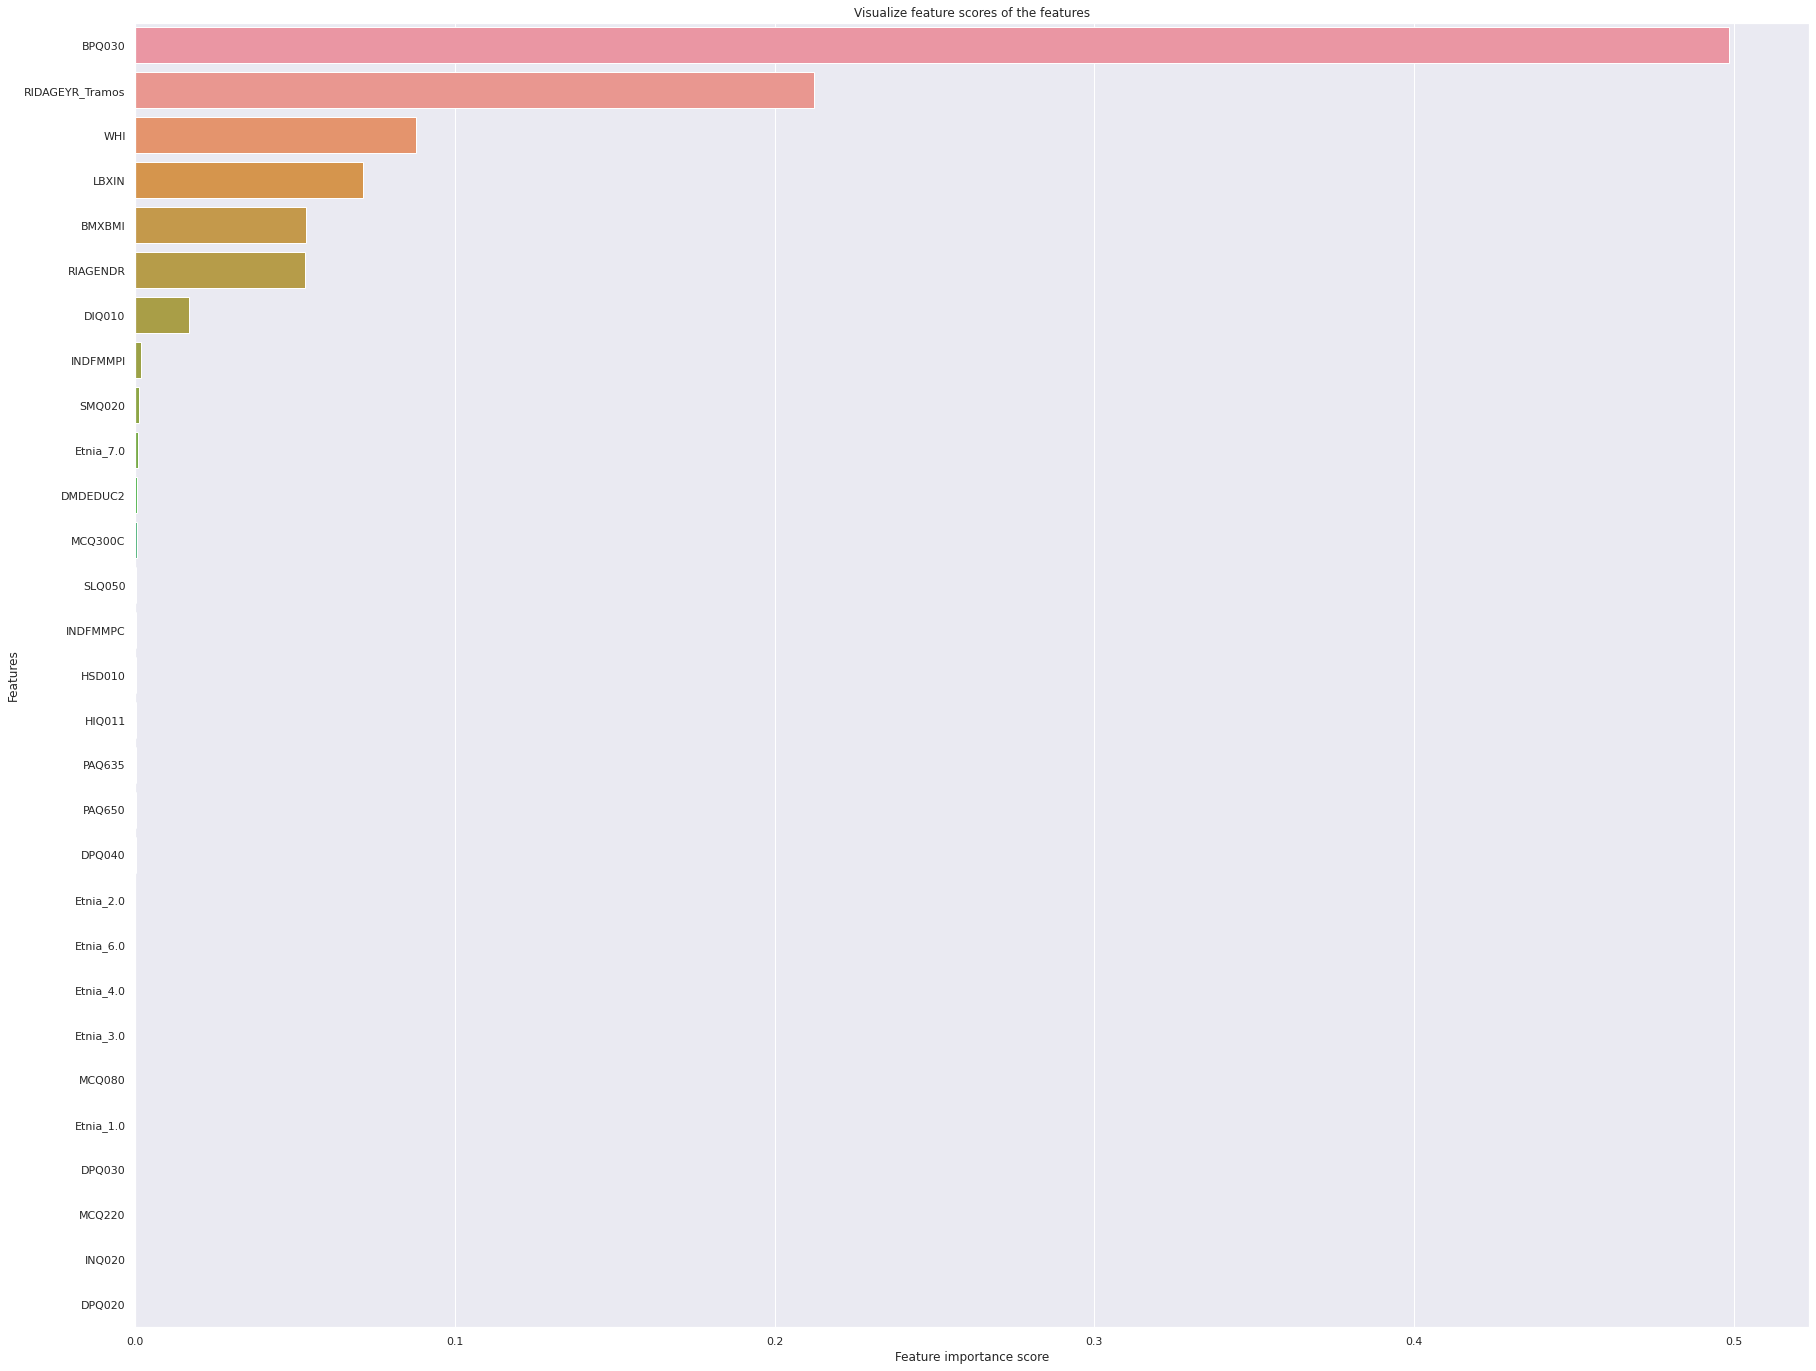

In [ ]:
#IMPORTANCIA DE PARAMS BUENA 
# Creating a seaborn bar plot
# create the classifier with n_estimators = 100


#feature_scores


# fit the model to the training set

dt.fit(X_train, y_train)
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores_dt_csv.iloc[:, 1], y=feature_scores_dt_csv.iloc[:, 0])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores_dt_csv.iloc[:, 0])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#Random Forest

In [ ]:
#Modelo tras ajuste de parámetros
max_depth = 9
min_samples_split = 6
min_samples_leaf = 2
criterion = 'gini'
random_state = 1
n_estimators=100

# Create random forest
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state, min_samples_split = min_samples_split, criterion = criterion, min_samples_leaf = min_samples_leaf)

# Train the model using the training sets
rf.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=6,
                       random_state=1)

In [ ]:
y_pred_rf = rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_rf))
print(metrics.recall_score(y_test, y_pred_rf))
print(metrics.precision_score(y_test, y_pred_rf))
print(metrics.f1_score(y_test, y_pred_rf))

0.8630187976921645
0.8424467099165894
0.8211382113821138
0.8316559926806953


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_rf = pd.DataFrame(feature_scores)
feature_scores_rf.to_excel('feature_scores_rf_xlsx.xlsx')
feature_scores_rf.to_csv('feature_scores_rf_csv.csv')
feature_scores_rf_csv = pd.read_csv('feature_scores_rf_csv.csv')

#print (pd.DataFrame(feature_scores, columns=['A']))
#df.to_excel('feature_scores_rf.xlsx')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


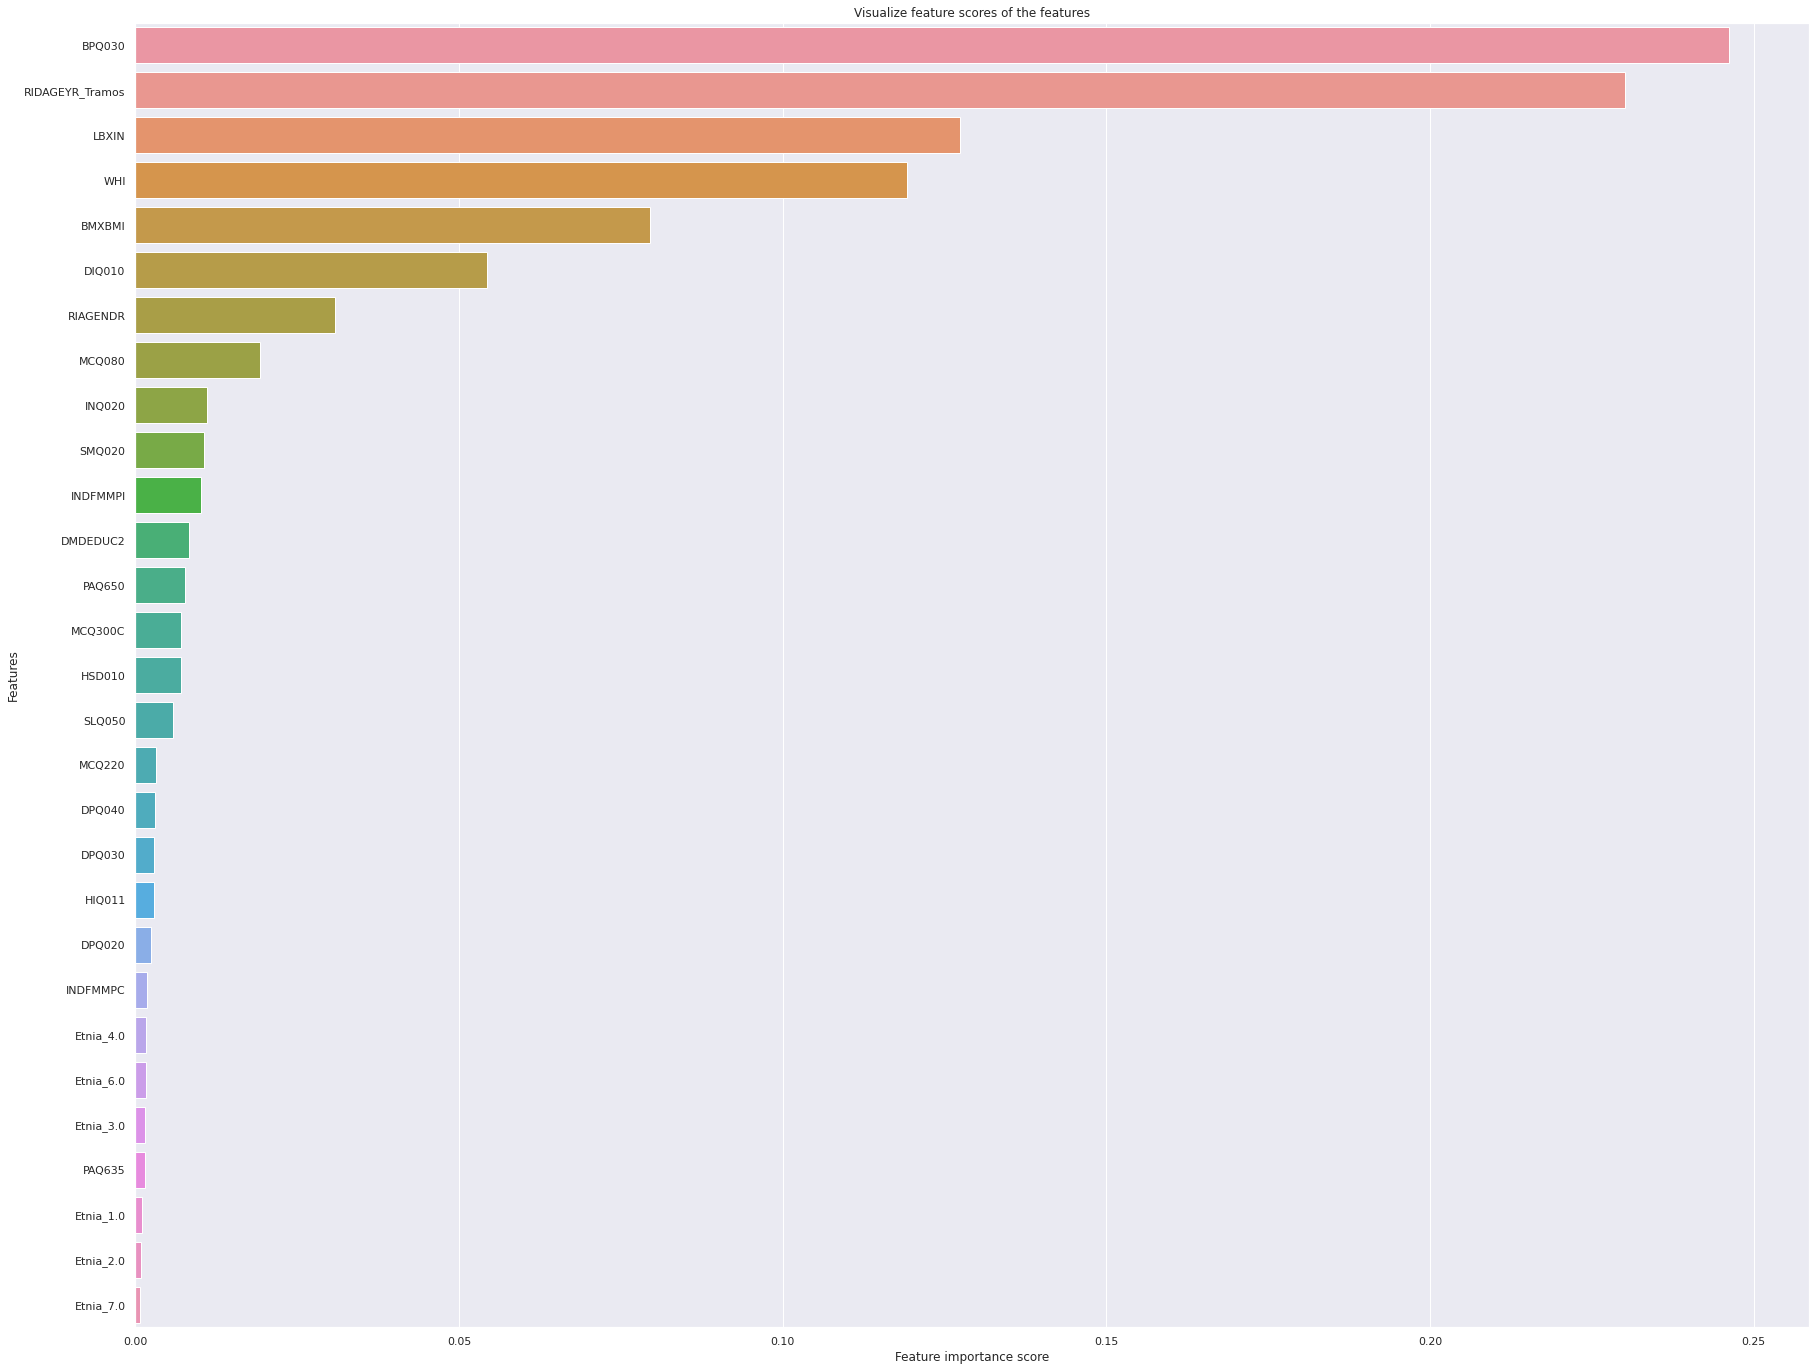

In [ ]:
#IMPORTANCIA DE PARAMS BUENA 
# Creating a seaborn bar plot
# create the classifier with n_estimators = 100


#feature_scores


# fit the model to the training set

rf.fit(X_train, y_train)
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores_rf_csv.iloc[:, 1], y=feature_scores_rf_csv.iloc[:, 0])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores_rf_csv.iloc[:, 0])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#SVC

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=0.3, gamma = 'scale') 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

'''
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))
'''

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with rbf kernel and C=100.0 : 0.8589


'\nfrom sklearn.metrics import classification_report\n\nprint(classification_report(y_test, y_pred_test))\n'

In [ ]:
y_pred_svc = svc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_svc))
print(metrics.recall_score(y_test, y_pred_svc))
print(metrics.precision_score(y_test, y_pred_svc))
print(metrics.f1_score(y_test, y_pred_svc))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.8589242508840499
0.8206672845227062
0.826797385620915
0.8237209302325581


#XGBoost

In [ ]:
#modelo con todo ajustado
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=150,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


'''
print(confusion_matrix(y_test, y_pred))
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

y_score1 = xgb.predict_proba(X_test)[:,1]
print('roc_auc_score for xgb: ', roc_auc_score(y_test, y_score1))
'''

"\nprint(confusion_matrix(y_test, y_pred))\nprint('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))\nprint(classification_report(y_test, y_pred))\n\ny_score1 = xgb.predict_proba(X_test)[:,1]\nprint('roc_auc_score for xgb: ', roc_auc_score(y_test, y_score1))\n"

In [ ]:
y_pred_xgb = xgb.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_xgb))
print(metrics.recall_score(y_test, y_pred_xgb))
print(metrics.precision_score(y_test, y_pred_xgb))
print(metrics.f1_score(y_test, y_pred_xgb))

0.8672994602642844
0.8493975903614458
0.825303917154435
0.8371774377711807


In [ ]:
feature_scores = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_xgb = pd.DataFrame(feature_scores)
feature_scores_xgb.to_excel('feature_scores_xgb_xlsx.xlsx')
feature_scores_xgb.to_csv('feature_scores_xgb_csv.csv')
feature_scores_xgb_csv = pd.read_csv('feature_scores_xgb_csv.csv')

#print (pd.DataFrame(feature_scores, columns=['A']))
#df.to_excel('feature_scores_xgb.xlsx')

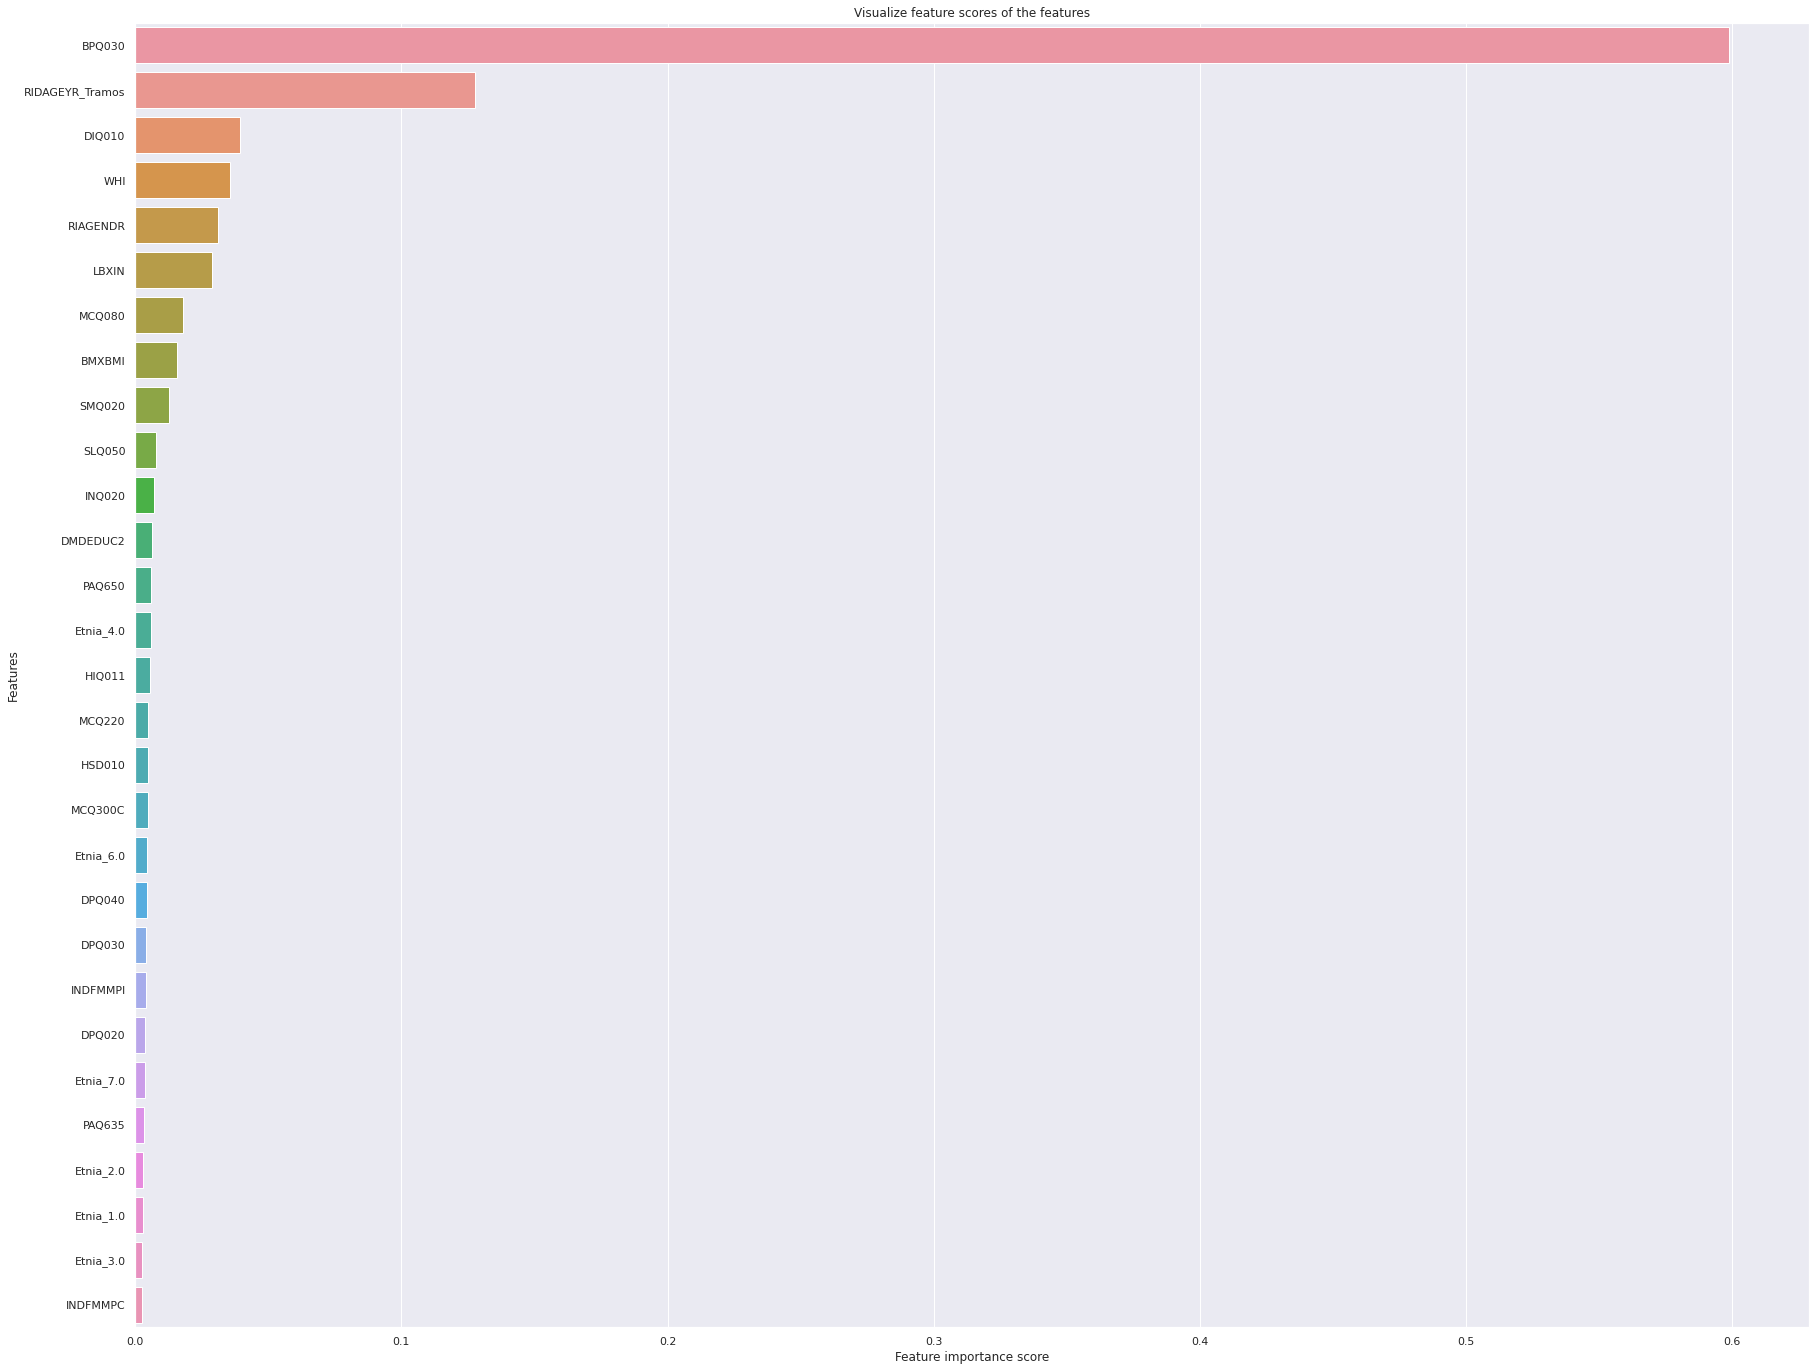

In [ ]:
#IMPORTANCIA DE PARAMS BUENA 
# Creating a seaborn bar plot
# create the classifier with n_estimators = 100


#feature_scores


# fit the model to the training set

xgb.fit(X_train, y_train)
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores_xgb_csv.iloc[:, 1], y=feature_scores_xgb_csv.iloc[:, 0])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores_xgb_csv.iloc[:, 0])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#Neural network

In [ ]:

#CREAR DEFINITIVO
from tensorflow import keras
from tensorflow.keras.utils import set_random_seed
from keras.layers import Dropout
from keras.layers import BatchNormalization
    
# set random seed for reproducibility
seed(42)
set_random_seed(42)
    
model = Sequential()
    
    # create first hidden layer
model.add(Dense(4, activation = 'relu', input_dim=X_train.shape[1]))
#model.add(BatchNormalization())
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.08))
model.add(Dense(1, activation='sigmoid'))
    
    
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics = ['binary_accuracy', 'accuracy', 'MeanSquaredError',
        'AUC'])

        
early_stopping = keras.callbacks.EarlyStopping(
patience=10,
min_delta=0.001,
restore_best_weights=True,
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=90,
    verbose=0, # hide the output because we have so many epochs
)
    

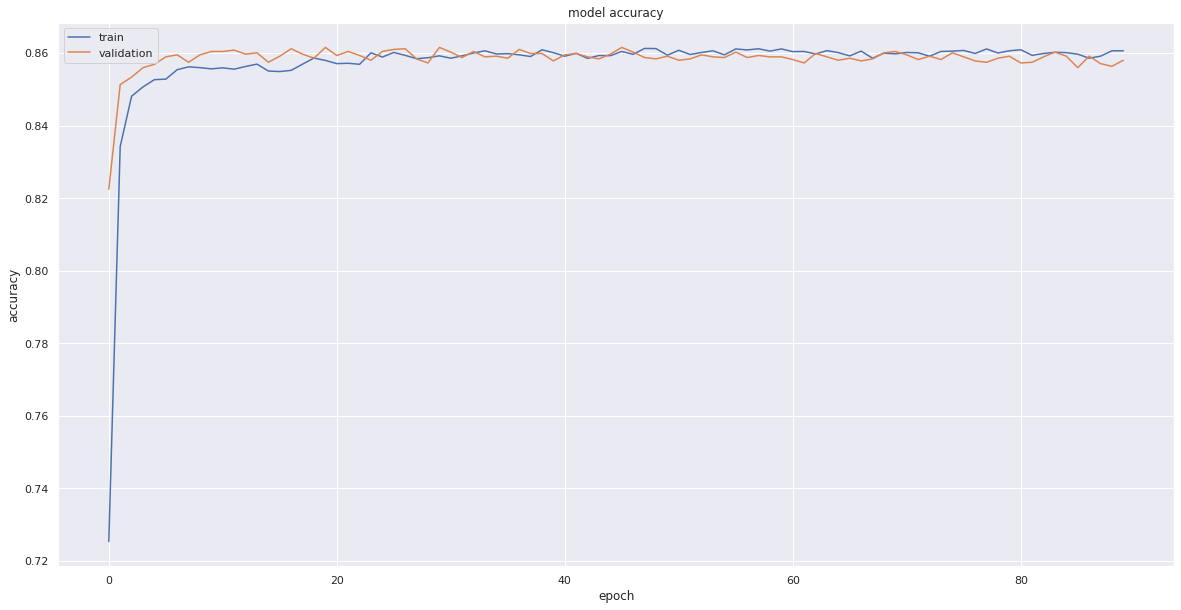

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Validation Loss: 0.3083
Best Validation Accuracy: 0.8615
Accuracy:  0.8612506985664368
Val_accuracy:  0.8615298867225647
Bin accuracy:  0.8612506985664368
Val binary accuracy:  0.8615298867225647
Loss:  0.3058777153491974
Val loss:  0.3083275258541107


<Figure size 1440x720 with 0 Axes>

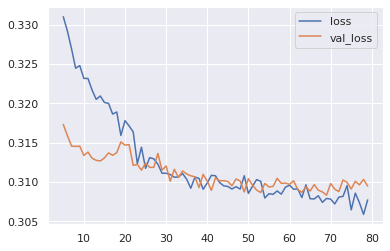

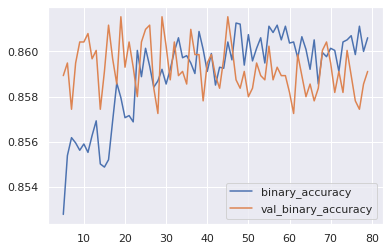

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
plt.figure(figsize = (20,10))
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

print('Accuracy: ', history_df['accuracy'].max())
print('Val_accuracy: ', history_df['val_accuracy'].max())
print('Bin accuracy: ', history_df['binary_accuracy'].max())
print('Val binary accuracy: ', history_df['val_binary_accuracy'].max())
print('Loss: ', history_df['loss'].min())
print('Val loss: ', history_df['val_loss'].min())

Neural network auc: 0.939573967601474


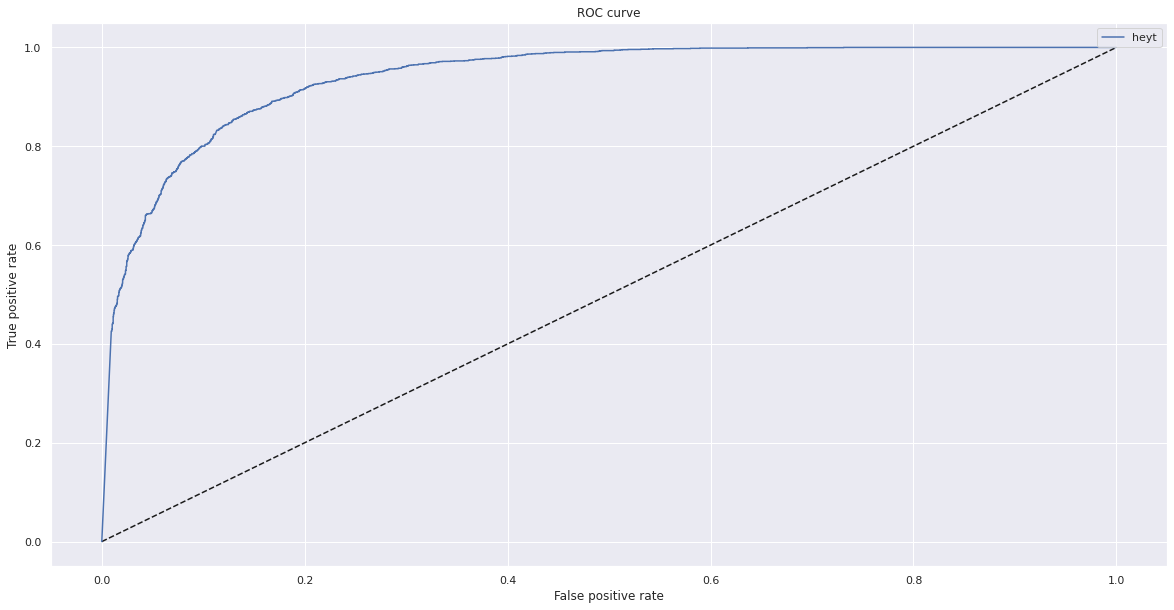

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print('Neural network auc:', auc_keras)
plt.figure(figsize = (20,10))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(nn_fpr_keras, nn_tpr_keras, label = 'heyt')
#plt.plot(nn_fpr_rf, nn_tpr_rf, label='RF (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
    # evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)


In [ ]:
print(loss)
print(f1_score)
print(precision)
print(recall)


0.3077174723148346
0.8645077347755432
0.09682276099920273
0.939420759677887


In [ ]:
print(y_pred)

[9.7777033e-01 5.4035032e-01 7.3876435e-01 ... 3.1947815e-01 1.7451099e-01
 7.7673793e-04]


#Comparativa ROC CURVE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


roc_auc_score for DecisionTree:  0.9296740977548186
roc_auc_score for RandomForest:  0.9428476917599816
roc_auc_score for Xgboost:  0.9472459523462915
roc_auc_score for SVC:  0.8526353529923018
roc_auc_score for NN:  0.939573967601474


<Figure size 432x288 with 0 Axes>

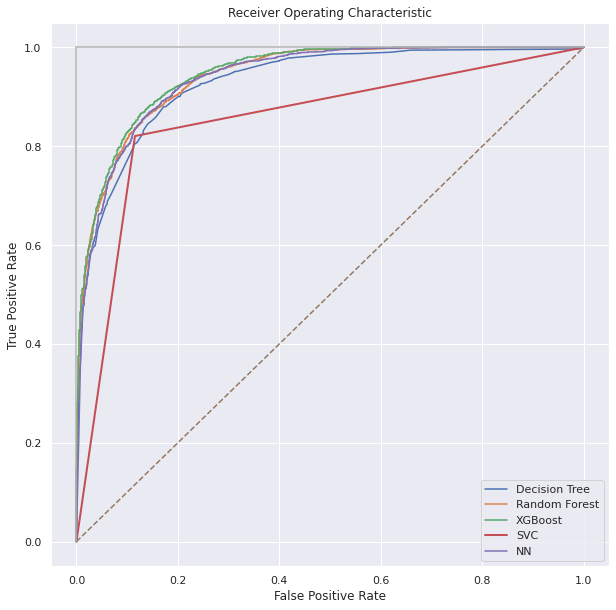

In [ ]:
#curva roc

from sklearn.metrics import roc_curve, roc_auc_score

auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
y_pred_nn = model.predict(X_test).ravel()

y_score1 = dt.predict_proba(X_test)[:,1]
y_score2 = rf.predict_proba(X_test)[:,1]
y_score3 = xgb.predict_proba(X_test)[:,1]
y_score4 = svc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score4)

plt.figure(figsize=(6,4))




false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred_nn)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)



print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Xgboost: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for SVC: ', roc_auc_score(y_test, y_score4))
print('roc_auc_score for NN: ', auc_keras)

plt.subplots(1, figsize=(10,10))


plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1, label = 'dt')
plt.plot(false_positive_rate2, true_positive_rate2, label = 'rf')
plt.plot(false_positive_rate3, true_positive_rate3, label = 'xgboost')
plt.plot(fpr, tpr, linewidth=2, label = 'svc')
plt.plot(nn_fpr_keras, nn_tpr_keras, label = 'NN')


plt.legend(['Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'NN'])

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Comparativa fetures_importances

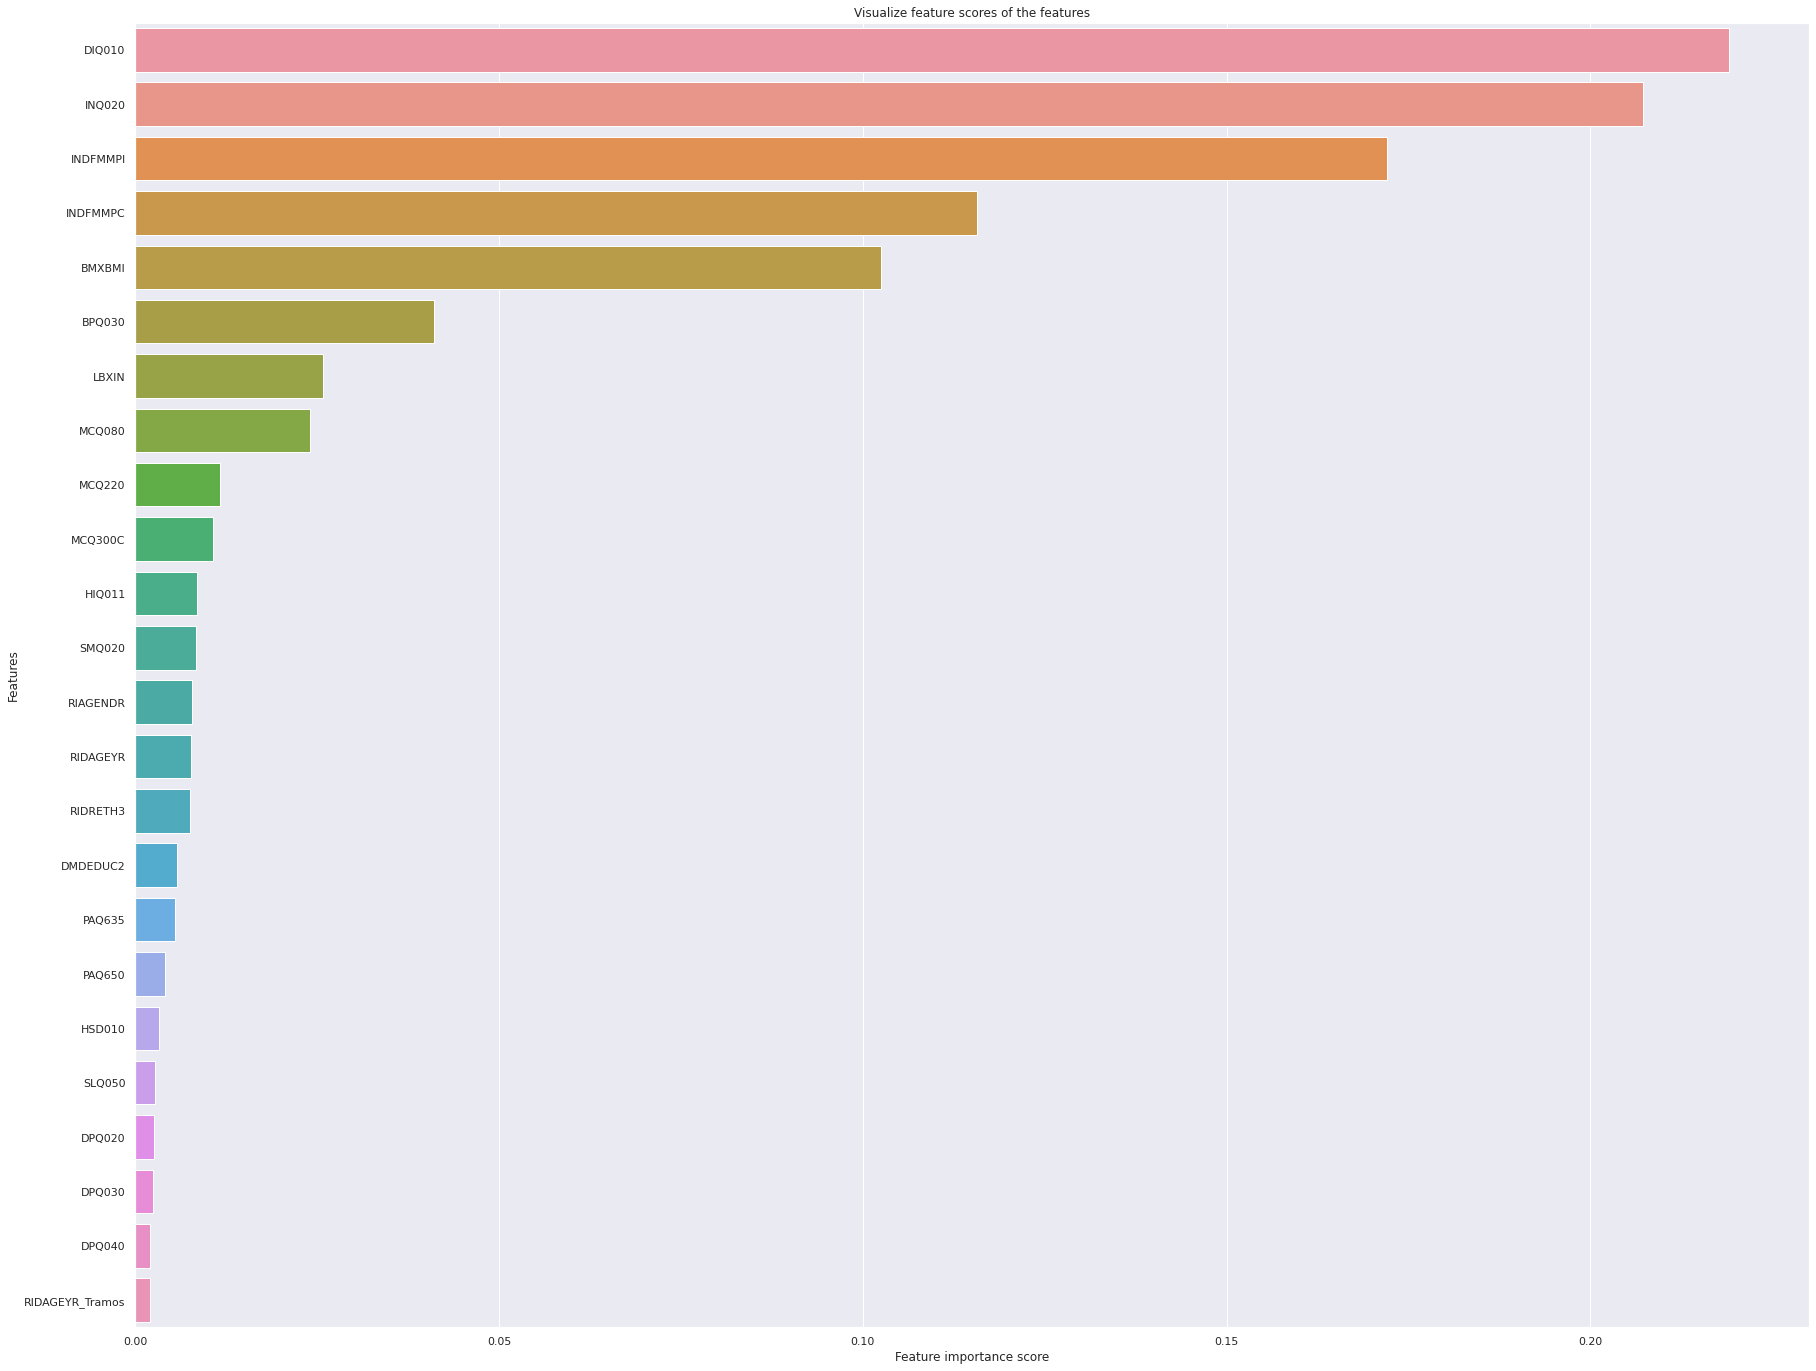

In [ ]:
#RANDOM FOREST
# Creating a seaborn bar plot
# create the classifier with n_estimators = 100
#Modelo tras ajuste de parámetros
max_depth = 9
min_samples_split = 6
min_samples_leaf = 2
criterion = 'gini'
random_state = 1
n_estimators=100

# Create random forest
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state, min_samples_split = min_samples_split, criterion = criterion, min_samples_leaf = min_samples_leaf)


clf = rf
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

#feature_scores


# fit the model to the training set


f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=X.columns)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(X.columns)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()